In [1]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = gym.make('FrozenLake-v0')

[2017-07-27 12:11:09,219] Making new env: FrozenLake-v0


In [18]:
print(np.argmax(allQ,1))

[2]


In [3]:
tf.reset_default_graph()

In [4]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Below we obtain the loss by taking the sum of squares difference between the target and prediction Q values.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

In [12]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.1
num_episodes = 2000
#create lists to contain total rewards and steps per episode
jList = []
rList = []
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        #Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            print(allQ)
            print(a)
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                e = 1./((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str((sum(rList)/num_episodes)*100) + "%")

[[ 0.00400592  0.00624557  0.00153587  0.00367094]]
[1]
[[ 0.00400592  0.00623308  0.00153587  0.00367094]]
[1]
[[ 0.00944642  0.00589546  0.00119535  0.0056881 ]]
[0]
[[ 0.00942753  0.00589546  0.00119535  0.0056881 ]]
[0]
[[ 0.00400592  0.00685685  0.00153587  0.00367094]]
[1]
[[ 0.0025435   0.00095955  0.00039701  0.00700845]]
[3]
[[ 0.00400592  0.00687316  0.00153587  0.00367094]]
[1]
[[ 0.0025435   0.00095955  0.00039701  0.00696765]]
[3]
[[ 0.00400592  0.00687812  0.00153587  0.00367094]]
[1]
[[ 0.00927239  0.00589546  0.00119535  0.0056881 ]]
[0]
[[ 0.00925384  0.00589546  0.00119535  0.0056881 ]]
[0]
[[ 0.00400592  0.00687812  0.00153587  0.00477268]]
[1]
[[ 0.0025435   0.00095955  0.00039701  0.00693598]]
[3]
[[ 0.0025435   0.00095955  0.00039701  0.00692211]]
[3]
[[ 0.00400592  0.00687582  0.00153587  0.00477268]]
[1]
[[ 0.00913344  0.00589546  0.00119535  0.0056881 ]]
[0]
[[ 0.00911517  0.00589546  0.00119535  0.0056881 ]]
[0]
[[ 0.00400592  0.00730908  0.00153587  0.0047726

[[ 0.00823854  0.00644673  0.00119535  0.00655094]]
[0]
[[ 0.00483398  0.00808516  0.00287197  0.00642758]]
[1]
[[ 0.00483398  0.00806899  0.00287197  0.00642758]]
[1]
[[ 0.00823854  0.00675825  0.00119535  0.00655094]]
[0]
[[ 0.00822206  0.00675825  0.00119535  0.00655094]]
[0]
[[ 0.00820561  0.00675825  0.00119535  0.00655094]]
[0]
[[ 0.00672889  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00820561  0.00675825  0.00119535  0.00657307]]
[0]
[[ 0.00483398  0.00808642  0.00287197  0.00642758]]
[1]
[[ 0.0025435   0.00239862  0.00316197  0.00808875]]
[3]
[[ 0.00483398  0.00807071  0.00287197  0.00642758]]
[1]
[[ 0.00829485  0.00675825  0.00119535  0.00657307]]
[0]
[[ 0.00483398  0.00809895  0.00287197  0.00642758]]
[1]
[[ 0.00483398  0.00808275  0.00287197  0.00642758]]
[1]
[[ 0.00483398  0.00806659  0.00287197  0.00642758]]
[1]
[[ 0.00483398  0.00805045  0.00287197  0.00642758]]
[1]
[[ 0.00483398  0.00803435  0.00287197  0.00642758]]
[1]
[[ 0.0025435   0.00239862  0.00316197  0.0082013

[[ 0.00368445  0.00620916  0.00316197  0.00839562]]
[3]
[[ 0.00550615  0.0082541   0.00389357  0.00706262]]
[1]
[[ 0.00834263  0.00675825  0.00119535  0.00686205]]
[0]
[[ 0.00832594  0.00675825  0.00119535  0.00686205]]
[0]
[[ 0.00550615  0.00825512  0.00389357  0.00706262]]
[1]
[[ 0.00550615  0.00823861  0.00389357  0.00706262]]
[1]
[[ 0.00368445  0.00620916  0.00316197  0.00835081]]
[3]
[[ 0.00550615  0.00824435  0.00389357  0.00706262]]
[1]
[[ 0.00839111  0.00675825  0.00119535  0.00686205]]
[0]
[[ 0.00550615  0.00825692  0.00389357  0.00706262]]
[1]
[[ 0.00834776  0.00675825  0.00119535  0.00686205]]
[0]
[[ 0.00700782  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00468894  0.00261963  0.00676307  0.00636537]]
[2]
[[ 0.00694535  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00468894  0.00261963  0.00678563  0.00636537]]
[2]
[[ 0.00670938  0.0025474   0.00777711  0.00837883]]
[3]
[[ 0.00468894  0.00261963  0.00708751  0.00636537]]
[2]
[[ 0.00670938  0.0025474   0.00777711  0.0081063

[1]
[[ 0.00461106  0.00703551  0.0041609   0.00836693]]
[3]
[[ 0.00461106  0.00703551  0.0041609   0.00835019]]
[3]
[[ 0.00684538  0.00824583  0.00601963  0.00731398]]
[1]
[[ 0.00834128  0.00732659  0.00234383  0.00706656]]
[0]
[[ 0.0083246   0.00732659  0.00234383  0.00706656]]
[0]
[[ 0.00684538  0.00824583  0.00646728  0.00731398]]
[1]
[[ 0.00684538  0.00822934  0.00646728  0.00731398]]
[1]
[[ 0.00684538  0.00821288  0.00646728  0.00731398]]
[1]
[[ 0.00684538  0.00819646  0.00646728  0.00731398]]
[1]
[[ 0.00461106  0.00703551  0.0041609   0.00831283]]
[3]
[[ 0.00461106  0.00703551  0.0041609   0.0082962 ]]
[3]
[[ 0.00461106  0.00703551  0.0041609   0.00827961]]
[3]
[[ 0.00684538  0.00820311  0.00646728  0.00731398]]
[1]
[[ 0.00684538  0.00820311  0.00646728  0.0074754 ]]
[1]
[[ 0.00461106  0.00703551  0.0041609   0.00835405]]
[3]
[[ 0.00684538  0.00821659  0.00646728  0.0074754 ]]
[1]
[[ 0.00710319  0.00821659  0.00646728  0.0074754 ]]
[1]
[[ 0.00710319  0.00821659  0.0068007   0.007

[1]
[[ 0.00461106  0.00703551  0.0041609   0.00826708]]
[3]
[[ 0.00749415  0.00817421  0.00745983  0.0074754 ]]
[1]
[[ 0.00749415  0.00817421  0.00758636  0.0074754 ]]
[1]
[[ 0.00825446  0.00748537  0.00360542  0.00745036]]
[0]
[[ 0.00749415  0.00817375  0.00758636  0.0074754 ]]
[1]
[[ 0.00461106  0.00703551  0.0041609   0.00823216]]
[3]
[[ 0.00749415  0.00816897  0.00758636  0.0074754 ]]
[1]
[[ 0.00833393  0.00748537  0.00360542  0.00745036]]
[0]
[[ 0.00831726  0.00748537  0.00360542  0.00745036]]
[0]
[[ 0.00749415  0.00818529  0.00758636  0.0074754 ]]
[1]
[[ 0.00838417  0.00748537  0.00360542  0.00745036]]
[0]
[[ 0.00749415  0.0082083   0.00758636  0.0074754 ]]
[1]
[[ 0.00833258  0.00748537  0.00360542  0.00745036]]
[0]
[[ 0.00831591  0.00748537  0.00360542  0.00745036]]
[0]
[[ 0.00829928  0.00748537  0.00360542  0.00745036]]
[0]
[[ 0.00828268  0.00748537  0.00360542  0.00745036]]
[0]
[[ 0.00749415  0.00821649  0.00758636  0.0074754 ]]
[1]
[[ 0.00749415  0.00821649  0.00758636  0.007

[[ 0.00468894  0.00261963  0.00768851  0.00636537]]
[2]
[[ 0.007599    0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.0075838   0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00468894  0.00261963  0.00765541  0.00636537]]
[2]
[[ 0.00758281  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00756764  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00468894  0.00261963  0.00762573  0.00636537]]
[2]
[[ 0.0076569   0.00827125  0.00797627  0.00775873]]
[1]
[[ 0.00843843  0.00768192  0.0049562   0.00745036]]
[0]
[[ 0.00842156  0.00768192  0.0049562   0.00745036]]
[0]
[[ 0.0076569   0.00828781  0.00797627  0.00775873]]
[1]
[[ 0.0076569   0.00827124  0.00797627  0.00775873]]
[1]
[[ 0.0076569   0.00825469  0.00797627  0.00775873]]
[1]
[[ 0.00559239  0.00703551  0.00565091  0.00833567]]
[3]
[[ 0.00559239  0.00703551  0.00565091  0.008319  ]]
[3]
[[ 0.00559239  0.00703551  0.00565091  0.00830236]]
[3]
[[ 0.00777599  0.00825469  0.00797627  0.00775873]]
[1]
[[ 0.00837823  0.00768192  0.0049562   0.0074503

[[ 0.00793437  0.0082744   0.00797627  0.00775873]]
[1]
[[ 0.00793437  0.00825785  0.00797627  0.00775873]]
[1]
[[ 0.00610366  0.00703551  0.00664197  0.00834892]]
[3]
[[ 0.00610366  0.00703551  0.00664197  0.00833222]]
[3]
[[ 0.00793437  0.00825936  0.00797627  0.00775873]]
[1]
[[ 0.00852585  0.00784493  0.0049562   0.00745036]]
[0]
[[ 0.00793437  0.00829561  0.00797627  0.00775873]]
[1]
[[ 0.00846321  0.00784493  0.0049562   0.00745036]]
[0]
[[ 0.00793437  0.0083122   0.00797627  0.00775873]]
[1]
[[ 0.00841639  0.00784493  0.0049562   0.00745036]]
[0]
[[ 0.00839955  0.00784493  0.0049562   0.00745036]]
[0]
[[ 0.00793437  0.00831621  0.00797627  0.00775873]]
[1]
[[ 0.00793437  0.00829958  0.00797627  0.00775873]]
[1]
[[ 0.00793437  0.00828298  0.00797627  0.00775873]]
[1]
[[ 0.00610366  0.00703551  0.00664197  0.00839614]]
[3]
[[ 0.00793437  0.00828882  0.00797627  0.00775873]]
[1]
[[ 0.00845001  0.00784493  0.0049562   0.00745036]]
[0]
[[ 0.00793437  0.00830416  0.00797627  0.0077587

[0]
[[ 0.00807624  0.00811801  0.00809641  0.00786806]]
[1]
[[ 0.00610366  0.00772547  0.00694538  0.00838745]]
[3]
[[ 0.00610366  0.00772547  0.00694538  0.00837067]]
[3]
[[ 0.00807624  0.00815512  0.00809641  0.00786806]]
[1]
[[ 0.00610366  0.00772547  0.00694538  0.00831125]]
[3]
[[ 0.00807624  0.00816973  0.00809641  0.00786806]]
[1]
[[ 0.00824818  0.00784493  0.0049562   0.00761647]]
[0]
[[ 0.00807624  0.00816892  0.00809641  0.00786806]]
[1]
[[ 0.00832891  0.00784493  0.0049562   0.00761647]]
[0]
[[ 0.00831225  0.00784493  0.0049562   0.00761647]]
[0]
[[ 0.00829562  0.00784493  0.0049562   0.00761647]]
[0]
[[ 0.00807624  0.00818426  0.00809641  0.00786806]]
[1]
[[ 0.00610366  0.00772547  0.00694538  0.00826661]]
[3]
[[ 0.00610366  0.00772547  0.00694538  0.00825007]]
[3]
[[ 0.00610366  0.00781389  0.00694538  0.00825007]]
[3]
[[ 0.00610366  0.00781389  0.00694538  0.00823357]]
[3]
[[ 0.00807624  0.0081842   0.00809641  0.00786806]]
[1]
[[ 0.00610366  0.00781389  0.00694538  0.008

[[ 0.00807624  0.00810208  0.00811245  0.00791319]]
[2]
[[ 0.00610366  0.00781389  0.00728667  0.00820331]]
[3]
[[ 0.00610366  0.00781389  0.00728667  0.0081869 ]]
[3]
[[ 0.00807624  0.00810208  0.00811421  0.00791319]]
[2]
[[ 0.00815585  0.00784493  0.0054909   0.00777432]]
[0]
[[ 0.00807624  0.00810208  0.00810623  0.00791319]]
[2]
[[ 0.00806602  0.00810208  0.00810623  0.00791319]]
[2]
[[ 0.00610366  0.00781389  0.00728667  0.00815614]]
[3]
[[ 0.00806602  0.00810208  0.0080999   0.00791319]]
[1]
[[ 0.00806602  0.00808588  0.0080999   0.00791319]]
[2]
[[ 0.00610366  0.00781389  0.00728667  0.00812912]]
[3]
[[ 0.00610366  0.00781389  0.00728667  0.00811286]]
[3]
[[ 0.00610366  0.00781389  0.00728667  0.00809664]]
[3]
[[ 0.00610366  0.00781389  0.00728667  0.00808045]]
[3]
[[ 0.00806602  0.00808588  0.00808948  0.00791319]]
[2]
[[ 0.00610366  0.00781389  0.00728667  0.00819472]]
[3]
[[ 0.00806602  0.00808588  0.00809414  0.00791319]]
[2]
[[ 0.00610366  0.00781389  0.00728667  0.0082861

[[ 0.00806602  0.00806578  0.00822025  0.00791319]]
[2]
[[ 0.00806602  0.00806578  0.00820381  0.00791319]]
[2]
[[ 0.00610366  0.00781389  0.00771221  0.00838557]]
[3]
[[ 0.00610366  0.00781389  0.00771221  0.0083688 ]]
[3]
[[ 0.00806602  0.00806578  0.00822339  0.00791319]]
[2]
[[ 0.00806602  0.00806578  0.00820694  0.00791319]]
[2]
[[ 0.00806602  0.00806578  0.00819053  0.00791319]]
[2]
[[ 0.00837682  0.00780706  0.0054909   0.00784578]]
[0]
[[ 0.00806602  0.00806578  0.00821103  0.00791319]]
[2]
[[ 0.00843182  0.00780706  0.0054909   0.00784578]]
[0]
[[ 0.00841496  0.00780706  0.0054909   0.00784578]]
[0]
[[ 0.00806602  0.00806578  0.00823833  0.00791319]]
[2]
[[ 0.00610366  0.00781389  0.00771221  0.00832327]]
[3]
[[ 0.00806602  0.00806578  0.00823867  0.00791319]]
[2]
[[ 0.00841496  0.00787684  0.0054909   0.00784578]]
[0]
[[ 0.00839813  0.00787684  0.0054909   0.00784578]]
[0]
[[ 0.00806602  0.00806578  0.0082571   0.00791319]]
[2]
[[ 0.00610366  0.00781389  0.00771221  0.0082898

[[ 0.00831316  0.00787684  0.0054909   0.00801317]]
[0]
[[ 0.00812001  0.00809992  0.00829201  0.00807168]]
[2]
[[ 0.00838089  0.00787684  0.0054909   0.00801317]]
[0]
[[ 0.00812001  0.00809992  0.00829302  0.00807168]]
[2]
[[ 0.00610366  0.00781389  0.00771221  0.00837496]]
[3]
[[ 0.00812001  0.00809992  0.00829266  0.00807168]]
[2]
[[ 0.00812001  0.00809992  0.00827607  0.00807168]]
[2]
[[ 0.00812001  0.00809992  0.00825952  0.00807168]]
[2]
[[ 0.00812001  0.00809992  0.008243    0.00807168]]
[2]
[[ 0.00843507  0.00787684  0.0054909   0.00801317]]
[0]
[[ 0.0084182   0.00787684  0.0054909   0.00801317]]
[0]
[[ 0.00840137  0.00787684  0.0054909   0.00801317]]
[0]
[[ 0.00838456  0.00787684  0.0054909   0.00801317]]
[0]
[[ 0.00782575  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00781009  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00838456  0.00787684  0.00594222  0.00801317]]
[0]
[[ 0.00836779  0.00787684  0.00594222  0.00801317]]
[0]
[[ 0.00812001  0.00809992  0.00826455  0.0080716

[1]
[[ 0.00837324  0.00787684  0.00648414  0.00801317]]
[0]
[[ 0.00812001  0.00819977  0.00816901  0.00814025]]
[1]
[[ 0.00832215  0.00787684  0.00648414  0.00801317]]
[0]
[[ 0.00812001  0.0082076   0.00816901  0.00814025]]
[1]
[[ 0.00838808  0.00787684  0.00648414  0.00801317]]
[0]
[[ 0.0083713   0.00787684  0.00648414  0.00801317]]
[0]
[[ 0.00812001  0.00822692  0.00816901  0.00814025]]
[1]
[[ 0.00832597  0.00787684  0.00648414  0.00801317]]
[0]
[[ 0.00830932  0.00787684  0.00648414  0.00801317]]
[0]
[[ 0.00812001  0.00823008  0.00816901  0.00814025]]
[1]
[[ 0.00812001  0.00821362  0.00816901  0.00814025]]
[1]
[[ 0.00812001  0.00819719  0.00816901  0.00814025]]
[1]
[[ 0.00827701  0.00787684  0.00648414  0.00801317]]
[0]
[[ 0.00826046  0.00787684  0.00648414  0.00801317]]
[0]
[[ 0.00812001  0.0081966   0.00816901  0.00814025]]
[1]
[[ 0.00812001  0.00818021  0.00816901  0.00814025]]
[1]
[[ 0.00812001  0.00816385  0.00816901  0.00814025]]
[2]
[[ 0.00812001  0.00814854  0.00816901  0.008

[1]
[[ 0.00809731  0.00814473  0.00809842  0.00809833]]
[1]
[[ 0.00610366  0.00787271  0.00790013  0.00821232]]
[3]
[[ 0.00809731  0.00814182  0.00809842  0.00809833]]
[1]
[[ 0.00610366  0.00787271  0.00790013  0.00830021]]
[3]
[[ 0.00809731  0.0081569   0.00809842  0.00809833]]
[1]
[[ 0.00809731  0.00814059  0.00809842  0.00809833]]
[1]
[[ 0.008398    0.00787684  0.00675314  0.00808286]]
[0]
[[ 0.00838121  0.00787684  0.00675314  0.00808286]]
[0]
[[ 0.00809731  0.00817527  0.00809842  0.00809833]]
[1]
[[ 0.00610366  0.00787271  0.00790013  0.00837053]]
[3]
[[ 0.00809731  0.00819758  0.00809842  0.00809833]]
[1]
[[ 0.00809731  0.00818119  0.00809842  0.00809833]]
[1]
[[ 0.00809731  0.00816483  0.00809842  0.00809833]]
[1]
[[ 0.00809731  0.0081485   0.00809842  0.00809833]]
[1]
[[ 0.00809731  0.0081322   0.00809842  0.00809833]]
[1]
[[ 0.00843533  0.00787684  0.00675314  0.00808286]]
[0]
[[ 0.00841846  0.00787684  0.00675314  0.00808286]]
[0]
[[ 0.00809731  0.00817595  0.00809842  0.008

[[ 0.00811219  0.00811514  0.0082328   0.00810973]]
[2]
[[ 0.00824175  0.0078689   0.00675314  0.00808286]]
[0]
[[ 0.00811219  0.00811514  0.0082181   0.00810973]]
[2]
[[ 0.00832376  0.0078689   0.00675314  0.00808286]]
[0]
[[ 0.00811219  0.00811514  0.00822259  0.00810973]]
[2]
[[ 0.00828708  0.0078689   0.00675314  0.00808286]]
[0]
[[ 0.00827051  0.0078689   0.00675314  0.00808286]]
[0]
[[ 0.00811219  0.00811514  0.00821891  0.00810973]]
[2]
[[ 0.00703861  0.00787271  0.00790013  0.00838894]]
[3]
[[ 0.00811219  0.00811514  0.00823614  0.00810973]]
[2]
[[ 0.00827051  0.00792246  0.00675314  0.00808286]]
[0]
[[ 0.00825396  0.00792246  0.00675314  0.00808286]]
[0]
[[ 0.00811219  0.00811514  0.00822647  0.00810973]]
[2]
[[ 0.00811219  0.00811514  0.00821002  0.00810973]]
[2]
[[ 0.00811219  0.00811514  0.0081936   0.00810973]]
[2]
[[ 0.00703861  0.00787271  0.00790013  0.0083419 ]]
[3]
[[ 0.00811219  0.00811514  0.00820658  0.00810973]]
[2]
[[ 0.00703861  0.00787271  0.00790013  0.0082984

[[ 0.00814275  0.00818446  0.00824179  0.00810973]]
[2]
[[ 0.00703861  0.00802853  0.00790013  0.00830515]]
[3]
[[ 0.00814275  0.00818446  0.00823785  0.00810973]]
[2]
[[ 0.00703861  0.00802853  0.00790013  0.00827522]]
[3]
[[ 0.00814275  0.00818446  0.00822878  0.00810973]]
[2]
[[ 0.00703861  0.00802853  0.00790013  0.00835053]]
[3]
[[ 0.00703861  0.00802853  0.00790013  0.00833383]]
[3]
[[ 0.00814275  0.00818446  0.00823643  0.00810973]]
[2]
[[ 0.00856093  0.00806833  0.00675314  0.0080977 ]]
[0]
[[ 0.00854381  0.00806833  0.00675314  0.0080977 ]]
[0]
[[ 0.00852672  0.00806833  0.00675314  0.0080977 ]]
[0]
[[ 0.00850967  0.00806833  0.00675314  0.0080977 ]]
[0]
[[ 0.00814275  0.00818446  0.0082842   0.00810973]]
[2]
[[ 0.00703861  0.00802853  0.00790013  0.00829788]]
[3]
[[ 0.00814275  0.00818446  0.00827034  0.00810973]]
[2]
[[ 0.00844801  0.00806833  0.00675314  0.0080977 ]]
[0]
[[ 0.00843111  0.00806833  0.00675314  0.0080977 ]]
[0]
[[ 0.00841425  0.00806833  0.00675314  0.0080977

[[ 0.00703861  0.00806931  0.00794558  0.00824422]]
[3]
[[ 0.00703861  0.00806931  0.00794558  0.00822773]]
[3]
[[ 0.00813565  0.00812658  0.00815359  0.00811661]]
[2]
[[ 0.00819213  0.00806833  0.00675314  0.0080977 ]]
[0]
[[ 0.00817575  0.00806833  0.00675314  0.0080977 ]]
[0]
[[ 0.0081594   0.00806833  0.00675314  0.0080977 ]]
[0]
[[ 0.00814308  0.00806833  0.00675314  0.0080977 ]]
[0]
[[ 0.00813565  0.00812658  0.00814492  0.00811661]]
[2]
[[ 0.00813565  0.00812658  0.00812863  0.00811661]]
[0]
[[ 0.00811938  0.00812658  0.00812863  0.00811661]]
[2]
[[ 0.00811938  0.00812658  0.00811237  0.00811661]]
[1]
[[ 0.00703861  0.00806931  0.00794558  0.0081966 ]]
[3]
[[ 0.00703861  0.00806931  0.00794558  0.0081802 ]]
[3]
[[ 0.00811938  0.00812419  0.00811237  0.00811661]]
[1]
[[ 0.00812716  0.00806833  0.00675314  0.0080977 ]]
[0]
[[ 0.00811938  0.00810853  0.00811237  0.00811661]]
[0]
[[ 0.00810314  0.00810853  0.00811237  0.00811661]]
[3]
[[ 0.00823209  0.00806833  0.00675314  0.0080977

[0]
[[ 0.00845919  0.00806833  0.00675314  0.00804435]]
[0]
[[ 0.00844227  0.00806833  0.00675314  0.00804435]]
[0]
[[ 0.00842539  0.00806833  0.00675314  0.00804435]]
[0]
[[ 0.00805319  0.0083627   0.00812204  0.00804647]]
[1]
[[ 0.00805319  0.00834597  0.00812204  0.00804647]]
[1]
[[ 0.00703861  0.00805317  0.00794558  0.00843671]]
[3]
[[ 0.00805319  0.00834725  0.00812204  0.00804647]]
[1]
[[ 0.00847067  0.00806833  0.00675314  0.00804435]]
[0]
[[ 0.00805319  0.00835499  0.00812204  0.00804647]]
[1]
[[ 0.00703861  0.00805317  0.00794558  0.00847973]]
[3]
[[ 0.00703861  0.00805317  0.00794558  0.00846277]]
[3]
[[ 0.00805319  0.00836298  0.00812204  0.00804647]]
[1]
[[ 0.00703861  0.00805317  0.00794558  0.00842609]]
[3]
[[ 0.00805319  0.00835875  0.00812204  0.00804647]]
[1]
[[ 0.00703861  0.00805317  0.00794558  0.00847123]]
[3]
[[ 0.00805319  0.0083643   0.00812204  0.00804647]]
[1]
[[ 0.00703861  0.00805317  0.00794558  0.00843312]]
[3]
[[ 0.00805319  0.0083612   0.00812204  0.008

[[ 0.00724624  0.00805317  0.00808683  0.00826163]]
[3]
[[ 0.008093    0.00819245  0.00812204  0.00807643]]
[1]
[[ 0.00840156  0.00810911  0.00675314  0.00803806]]
[0]
[[ 0.00838476  0.00810911  0.00675314  0.00803806]]
[0]
[[ 0.00836799  0.00810911  0.00675314  0.00803806]]
[0]
[[ 0.00835126  0.00810911  0.00675314  0.00803806]]
[0]
[[ 0.00833455  0.00810911  0.00675314  0.00803806]]
[0]
[[ 0.008093    0.00821747  0.00812204  0.00807643]]
[1]
[[ 0.0082947   0.00810911  0.00675314  0.00803806]]
[0]
[[ 0.008093    0.00821633  0.00812204  0.00807643]]
[1]
[[ 0.008093    0.0081999   0.00812204  0.00807643]]
[1]
[[ 0.00724624  0.00805317  0.00808683  0.00823141]]
[3]
[[ 0.008093    0.00818974  0.00812204  0.00807643]]
[1]
[[ 0.008093    0.00817336  0.00812204  0.00807643]]
[1]
[[ 0.00724624  0.00805317  0.00808683  0.0082067 ]]
[3]
[[ 0.008093    0.00816361  0.00812204  0.00807643]]
[1]
[[ 0.00836612  0.00810911  0.00675314  0.00803806]]
[0]
[[ 0.00813047  0.00215047  0.00035122  0.0027345

[[ 0.00740934  0.00805317  0.00808683  0.00830336]]
[3]
[[ 0.008093    0.00822241  0.00812204  0.00807135]]
[1]
[[ 0.00810311  0.00846283  0.00727286  0.00807376]]
[1]
[[ 0.00816487  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00814854  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00810311  0.00838691  0.00727286  0.00807376]]
[1]
[[ 0.008093    0.00825357  0.00812204  0.00807135]]
[1]
[[ 0.00810311  0.00843989  0.00727286  0.00807376]]
[1]
[[ 0.00817944  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00810311  0.00837144  0.00727286  0.00807376]]
[1]
[[ 0.008093    0.00827395  0.00812204  0.00807135]]
[1]
[[ 0.00810311  0.00833539  0.00727286  0.00807376]]
[1]
[[ 0.0082011   0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.0081847   0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00810311  0.00829213  0.00727286  0.00807376]]
[1]
[[ 0.008093    0.00826957  0.00812204  0.00807135]]
[1]
[[ 0.00740934  0.00805317  0.00808683  0.00827073]]
[3]
[[ 0.008093    0.00825326  0.00812204  0.0080713

[[ 0.008093    0.00811767  0.00825108  0.00809484]]
[2]
[[ 0.008093    0.00811767  0.00823458  0.00809484]]
[2]
[[ 0.00810081  0.00827842  0.00754865  0.00807619]]
[1]
[[ 0.008093    0.00811767  0.00822679  0.00809484]]
[2]
[[ 0.008093    0.00811767  0.00821034  0.00809484]]
[2]
[[ 0.00740934  0.00805317  0.00808683  0.00844569]]
[3]
[[ 0.008093    0.00811767  0.00824052  0.00809484]]
[2]
[[ 0.00810081  0.00835309  0.00754865  0.00807619]]
[1]
[[ 0.008093    0.00811767  0.00824633  0.00809484]]
[2]
[[ 0.00740934  0.00805317  0.00808683  0.00838818]]
[3]
[[ 0.00740934  0.00805317  0.00808683  0.0083714 ]]
[3]
[[ 0.00740934  0.00805317  0.00808683  0.00835466]]
[3]
[[ 0.00740934  0.00805317  0.00808683  0.00833795]]
[3]
[[ 0.008093    0.00811767  0.00825792  0.00809484]]
[2]
[[ 0.008093    0.00811767  0.0082414   0.00809484]]
[2]
[[ 0.008093    0.00811767  0.00822492  0.00809484]]
[2]
[[ 0.00810081  0.00831525  0.00754865  0.00807619]]
[1]
[[ 0.008093    0.00811767  0.00822636  0.0080948

[1]
[[ 0.00810181  0.00818641  0.00842122  0.00809484]]
[2]
[[ 0.00815365  0.00843932  0.00754865  0.00807619]]
[1]
[[ 0.00810181  0.00818641  0.00840796  0.00809484]]
[2]
[[ 0.00815365  0.00848182  0.00754865  0.00807619]]
[1]
[[ 0.00837823  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00815365  0.00844435  0.00754865  0.00807619]]
[1]
[[ 0.00837457  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00468894  0.00382282  0.00857989  0.00690847]]
[2]
[[ 0.00670938  0.0025474   0.00774583  0.00877243]]
[3]
[[ 0.00283799  0.00929645  0.00435462  0.00643428]]
[1]
[[ 0.00810181  0.00818641  0.00840577  0.00809484]]
[2]
[[ 0.00810181  0.00818641  0.00838896  0.00809484]]
[2]
[[ 0.00758957  0.00805317  0.00865377  0.00832673]]
[2]
[[ 0.00810181  0.00818641  0.00842462  0.00809484]]
[2]
[[ 0.00815365  0.00841364  0.00754865  0.00807619]]
[1]
[[ 0.00810181  0.00818641  0.00840559  0.00809484]]
[2]
[[ 0.00810181  0.00818641  0.00838878  0.00809484]]
[2]
[[ 0.00815365  0.00839522  0.00754865  0.008

[1]
[[ 0.00825325  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00820625  0.00830548  0.00754865  0.00807619]]
[1]
[[ 0.00824708  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00468894  0.00382282  0.00864896  0.00690847]]
[2]
[[ 0.00670938  0.0025474   0.00774583  0.0089925 ]]
[3]
[[ 0.00810181  0.00824257  0.00834235  0.00809484]]
[2]
[[ 0.00792845  0.00805317  0.00866525  0.00832673]]
[2]
[[ 0.00810181  0.00824257  0.0083896   0.00809484]]
[2]
[[ 0.00792845  0.00805317  0.00859334  0.00832673]]
[2]
[[ 0.00810181  0.00824257  0.00841316  0.00809484]]
[2]
[[ 0.00810181  0.00824257  0.00839634  0.00809484]]
[2]
[[ 0.00810181  0.00824257  0.00837955  0.00809484]]
[2]
[[ 0.00820625  0.00827731  0.00754865  0.00807619]]
[1]
[[ 0.00831016  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00820625  0.00826726  0.00754865  0.00807619]]
[1]
[[ 0.00810181  0.00824257  0.00834254  0.00809484]]
[2]
[[ 0.00820625  0.00834417  0.00754865  0.00807619]]
[1]
[[ 0.00810181  0.00824257  0.00832618  0.008

[[ 0.00812664  0.00823453  0.00847444  0.00809484]]
[2]
[[ 0.00792845  0.00805317  0.00883802  0.00832673]]
[2]
[[ 0.00812664  0.00823453  0.00852948  0.00809484]]
[2]
[[ 0.00820625  0.00843691  0.00754865  0.00807619]]
[1]
[[ 0.00812664  0.00823453  0.00849409  0.00809484]]
[2]
[[ 0.00792845  0.00805317  0.00875925  0.00832673]]
[2]
[[ 0.0065928   0.00945098  0.00406916  0.00562383]]
[1]
[[ 0.0065928   0.00943208  0.00406916  0.00562383]]
[1]
[[ 0.0065928   0.00941321  0.00406916  0.00562383]]
[1]
[[ 0.0065928   0.00939439  0.00406916  0.00562383]]
[1]
[[ 0.00812664  0.00823453  0.0085296   0.00809484]]
[2]
[[ 0.00792845  0.00805317  0.00887869  0.00832673]]
[2]
[[ 0.0065928   0.00946721  0.00406916  0.00562383]]
[1]
[[ 0.00812664  0.00823453  0.00858166  0.00809484]]
[2]
[[ 0.00812664  0.00823453  0.0085645   0.00809484]]
[2]
[[ 0.00820625  0.00843136  0.00754865  0.00807619]]
[1]
[[ 0.00812664  0.00823453  0.00852101  0.00809484]]
[2]
[[ 0.00820625  0.00843225  0.00754865  0.0080761

[0]
[[ 0.00468894  0.00487444  0.00891463  0.00690847]]
[2]
[[ 0.00855906  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00854194  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00820625  0.00845666  0.00754865  0.00807619]]
[1]
[[ 0.00812664  0.00823453  0.00850573  0.00815858]]
[2]
[[ 0.00812664  0.00823453  0.00848871  0.00815858]]
[2]
[[ 0.00792845  0.00805317  0.00880458  0.00832673]]
[2]
[[ 0.00812664  0.00823453  0.00853428  0.00815858]]
[2]
[[ 0.00792845  0.00805317  0.00877403  0.00832673]]
[2]
[[ 0.00812664  0.00823453  0.00856468  0.00815858]]
[2]
[[ 0.00812664  0.00823453  0.00854755  0.00815858]]
[2]
[[ 0.00820625  0.00844946  0.00754865  0.00807619]]
[1]
[[ 0.00812664  0.00823453  0.00851103  0.00815858]]
[2]
[[ 0.00792845  0.00805317  0.00874958  0.00832673]]
[2]
[[ 0.00812664  0.00823453  0.00854124  0.00815858]]
[2]
[[ 0.00812664  0.00823453  0.00852416  0.00815858]]
[2]
[[ 0.00812664  0.00823453  0.00850711  0.00815858]]
[2]
[[ 0.00820625  0.00844476  0.00754865  0.008

[[ 0.00821317  0.00823453  0.00854818  0.00822513]]
[2]
[[ 0.00821317  0.00823453  0.00853108  0.00822513]]
[2]
[[ 0.00821317  0.00823453  0.00851402  0.00822513]]
[2]
[[ 0.00792845  0.00831728  0.0088256   0.00838493]]
[2]
[[ 0.00821317  0.00823453  0.00855869  0.00822513]]
[2]
[[ 0.00821317  0.00823453  0.00854157  0.00822513]]
[2]
[[ 0.00792845  0.00831728  0.00879084  0.00838493]]
[2]
[[ 0.00821317  0.00823453  0.00857384  0.00822513]]
[2]
[[ 0.00821317  0.00823453  0.00855669  0.00822513]]
[2]
[[ 0.00820625  0.00852425  0.00776928  0.00807619]]
[1]
[[ 0.00821317  0.00823453  0.00853316  0.00822513]]
[2]
[[ 0.00792845  0.00831728  0.00873029  0.00838493]]
[2]
[[ 0.00821317  0.00823453  0.00855512  0.00822513]]
[2]
[[ 0.00820625  0.00850897  0.00776928  0.00807619]]
[1]
[[ 0.00821317  0.00823453  0.00852888  0.00822513]]
[2]
[[ 0.00792845  0.00831728  0.0087146   0.00838493]]
[2]
[[ 0.00821317  0.00823453  0.00854859  0.00822513]]
[2]
[[ 0.00792845  0.00831728  0.0086643   0.0083849

[[ 0.00825843  0.00825037  0.00837929  0.00825472]]
[2]
[[ 0.00792845  0.00831728  0.00847984  0.00840172]]
[2]
[[ 0.00825843  0.00825037  0.00838244  0.00825472]]
[2]
[[ 0.00825843  0.00825037  0.00836567  0.00825472]]
[2]
[[ 0.00820625  0.00844856  0.00776928  0.00807619]]
[1]
[[ 0.00837153  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00835478  0.00215047  0.00035122  0.00273452]]
[0]
[[ 0.00468894  0.00487444  0.00874542  0.00690847]]
[2]
[[ 0.00670938  0.00488122  0.00774583  0.00884714]]
[3]
[[ 0.00283799  0.00917676  0.00536413  0.00687779]]
[1]
[[ 0.0065928   0.00925274  0.00662514  0.00562383]]
[1]
[[ 0.00283799  0.00917345  0.00536413  0.00687779]]
[1]
[[ 0.00936395  0.0054525   0.00898401  0.00925559]]
[0]
[[ 0.00283799  0.00919282  0.00536413  0.00687779]]
[1]
[[ 0.00931134  0.0054525   0.00898401  0.00925559]]
[0]
[[ 0.00825843  0.00825037  0.00836535  0.00825472]]
[2]
[[ 0.00792845  0.00831728  0.00851424  0.00840172]]
[2]
[[ 0.00825843  0.00825037  0.0083781   0.0082547

[0]
[[ 0.008429    0.00834993  0.00835578  0.00826264]]
[0]
[[ 0.00841214  0.00834993  0.00835578  0.00826264]]
[0]
[[ 0.00839532  0.00834993  0.00835578  0.00826264]]
[0]
[[ 0.00792845  0.00831728  0.00872312  0.0084675 ]]
[2]
[[ 0.0065928   0.00941348  0.00662514  0.00562383]]
[1]
[[ 0.00283799  0.00905112  0.00536413  0.00687779]]
[1]
[[ 0.0065928   0.00932291  0.00662514  0.00562383]]
[1]
[[ 0.00792845  0.00831728  0.00884236  0.0084675 ]]
[2]
[[ 0.00702503  0.00932291  0.00662514  0.00562383]]
[1]
[[ 0.00283799  0.00908683  0.00536413  0.00687779]]
[1]
[[ 0.00670938  0.00488122  0.00774583  0.0088026 ]]
[3]
[[ 0.00283799  0.00901238  0.00536413  0.00687779]]
[1]
[[ 0.00670938  0.00488122  0.00774583  0.00882653]]
[3]
[[ 0.00283799  0.00895756  0.00536413  0.00687779]]
[1]
[[ 0.00947232  0.0054525   0.00898401  0.00925559]]
[0]
[[ 0.00844343  0.00834993  0.00835578  0.00826264]]
[0]
[[ 0.00792845  0.00831728  0.00891982  0.0084675 ]]
[2]
[[ 0.00702503  0.00925752  0.00662514  0.005

[0]
[[ 0.00851556  0.00834244  0.00835578  0.00826164]]
[0]
[[ 0.00792845  0.00847175  0.00874168  0.0084675 ]]
[2]
[[ 0.0085433   0.00834244  0.00835578  0.00826164]]
[0]
[[ 0.00792845  0.00847175  0.00872371  0.0084675 ]]
[2]
[[ 0.00856193  0.00834244  0.00835578  0.00826164]]
[0]
[[ 0.00854481  0.00834244  0.00835578  0.00826164]]
[0]
[[ 0.00852772  0.00834244  0.00835578  0.00826164]]
[0]
[[ 0.00792845  0.00847175  0.00867423  0.0084675 ]]
[2]
[[ 0.00853967  0.00834244  0.00835578  0.00826164]]
[0]
[[ 0.00852259  0.00834244  0.00835578  0.00826164]]
[0]
[[ 0.00850555  0.00834244  0.00835578  0.00826164]]
[0]
[[ 0.00792845  0.00847175  0.00866974  0.0084675 ]]
[2]
[[ 0.00702503  0.00933847  0.00662514  0.00562383]]
[1]
[[ 0.00852105  0.00834244  0.00835578  0.00826164]]
[0]
[[ 0.00850401  0.00834244  0.00835578  0.00826164]]
[0]
[[ 0.00830082  0.00840105  0.00776928  0.00812478]]
[1]
[[ 0.00850401  0.00834244  0.00834803  0.00826164]]
[0]
[[ 0.008487    0.00834244  0.00834803  0.008

[1]
[[ 0.00670938  0.00488122  0.00774583  0.00891292]]
[3]
[[ 0.00834713  0.00834442  0.00874912  0.00826164]]
[2]
[[ 0.00834713  0.00834442  0.00873162  0.00826164]]
[2]
[[ 0.00821904  0.00904259  0.00857481  0.0084675 ]]
[1]
[[ 0.00834713  0.00834442  0.00877573  0.00826164]]
[2]
[[ 0.00832453  0.0084665   0.00776928  0.00812478]]
[1]
[[ 0.00834713  0.00834442  0.00869695  0.00826164]]
[2]
[[ 0.00821904  0.00896444  0.00857481  0.0084675 ]]
[1]
[[ 0.00834713  0.00834442  0.00873252  0.00826164]]
[2]
[[ 0.00832453  0.00849519  0.00776928  0.00812478]]
[1]
[[ 0.00834713  0.00834442  0.00866806  0.00826164]]
[2]
[[ 0.00821904  0.00890191  0.00857481  0.0084675 ]]
[1]
[[ 0.00821904  0.00888411  0.00857481  0.0084675 ]]
[1]
[[ 0.00821904  0.00886634  0.00857481  0.0084675 ]]
[1]
[[ 0.00821904  0.00884861  0.00857481  0.0084675 ]]
[1]
[[ 0.00821904  0.00883091  0.00857481  0.0084675 ]]
[1]
[[ 0.00834713  0.00834442  0.00869703  0.00826164]]
[2]
[[ 0.00834713  0.00834442  0.00867963  0.008

[[ 0.00283799  0.00907692  0.00536413  0.00687779]]
[1]
[[ 0.00670938  0.00488122  0.00774583  0.00891669]]
[3]
[[ 0.0083703   0.00836815  0.00854185  0.00826164]]
[2]
[[ 0.00826323  0.00893137  0.00859021  0.00846931]]
[1]
[[ 0.00826323  0.0089135   0.00859021  0.00846931]]
[1]
[[ 0.00702503  0.0093299   0.00662514  0.00629235]]
[1]
[[ 0.00283799  0.00902704  0.00536413  0.00687779]]
[1]
[[ 0.00702503  0.00925128  0.00662514  0.00629235]]
[1]
[[ 0.0083703   0.00836815  0.00860189  0.00826164]]
[2]
[[ 0.00826323  0.00897812  0.00859021  0.00846931]]
[1]
[[ 0.00826323  0.00896017  0.00859021  0.00846931]]
[1]
[[ 0.00826323  0.00894225  0.00859021  0.00846931]]
[1]
[[ 0.0083703   0.00836815  0.00865918  0.00826164]]
[2]
[[ 0.00826323  0.00888416  0.00859021  0.00846931]]
[1]
[[ 0.0083703   0.00836815  0.00868641  0.00826164]]
[2]
[[ 0.00832453  0.0085129   0.00776928  0.008191  ]]
[1]
[[ 0.00860495  0.00215047  0.00035122  0.00387725]]
[0]
[[ 0.00468894  0.00487444  0.00892045  0.0069084

[[ 0.00826323  0.00892666  0.00859021  0.00846931]]
[1]
[[ 0.00826323  0.00890881  0.00859021  0.00846931]]
[1]
[[ 0.00826323  0.00889099  0.00859021  0.00846931]]
[1]
[[ 0.00826323  0.00887321  0.00859021  0.00846931]]
[1]
[[ 0.0083703   0.008422    0.00861983  0.0083054 ]]
[2]
[[ 0.00832453  0.00854689  0.00791362  0.008191  ]]
[1]
[[ 0.0083703   0.008422    0.00858815  0.0083054 ]]
[2]
[[ 0.00832453  0.00856788  0.00791362  0.008191  ]]
[1]
[[ 0.0083703   0.008422    0.00856696  0.0083054 ]]
[2]
[[ 0.00832453  0.00858466  0.00791362  0.008191  ]]
[1]
[[ 0.0083703   0.008422    0.00855333  0.0083054 ]]
[2]
[[ 0.0083703   0.008422    0.00853623  0.0083054 ]]
[2]
[[ 0.00832453  0.00859809  0.00791362  0.008191  ]]
[1]
[[ 0.00853773  0.00215047  0.00035122  0.00387725]]
[0]
[[ 0.00832453  0.00856895  0.00791362  0.008191  ]]
[1]
[[ 0.00852684  0.00215047  0.00035122  0.00387725]]
[0]
[[ 0.00548151  0.00487444  0.00871851  0.00690847]]
[2]
[[ 0.0083703  0.008422   0.0085314  0.0083054]]


[[ 0.00832453  0.00851857  0.00791362  0.008191  ]]
[1]
[[ 0.0083703   0.0084406   0.00865202  0.00832617]]
[2]
[[ 0.0083703   0.0084406   0.00863472  0.00832617]]
[2]
[[ 0.00826323  0.0089994   0.00859021  0.00846931]]
[1]
[[ 0.0083703   0.0084406   0.00868966  0.00832617]]
[2]
[[ 0.00832453  0.00852796  0.00791362  0.008191  ]]
[1]
[[ 0.00846215  0.00215047  0.00035122  0.00387725]]
[0]
[[ 0.00832453  0.00849787  0.00791362  0.008191  ]]
[1]
[[ 0.0083703   0.0084406   0.00864026  0.00832617]]
[2]
[[ 0.00826323  0.00892988  0.00859021  0.00846931]]
[1]
[[ 0.00751978  0.00955244  0.00662514  0.00629235]]
[1]
[[ 0.00283799  0.00922959  0.00682074  0.00735836]]
[1]
[[ 0.00961622  0.0054525   0.00898401  0.00925559]]
[0]
[[ 0.00283799  0.00928769  0.00682074  0.00735836]]
[1]
[[ 0.00953194  0.0054525   0.00898401  0.00925559]]
[0]
[[ 0.00951287  0.0054525   0.00898401  0.00925559]]
[0]
[[ 0.00949385  0.0054525   0.00898401  0.00925559]]
[0]
[[ 0.0083703   0.0084406   0.00868033  0.0083261

[[ 0.00847926  0.00215047  0.00035122  0.0047809 ]]
[0]
[[ 0.0084623   0.00215047  0.00035122  0.0047809 ]]
[0]
[[ 0.00832453  0.0085025   0.00791362  0.00823893]]
[1]
[[ 0.00845333  0.00215047  0.00035122  0.0047809 ]]
[0]
[[ 0.00832453  0.00847576  0.00791362  0.00823893]]
[1]
[[ 0.00844569  0.0084406   0.00855323  0.00832617]]
[2]
[[ 0.00844569  0.0084406   0.00853612  0.00832617]]
[2]
[[ 0.00832453  0.00851097  0.00791362  0.00823893]]
[1]
[[ 0.00844087  0.00215047  0.00035122  0.0047809 ]]
[0]
[[ 0.00548151  0.00487444  0.00872556  0.00690847]]
[2]
[[ 0.00670938  0.00488122  0.00774583  0.00888064]]
[3]
[[ 0.00844569  0.0084406   0.00851407  0.00832617]]
[2]
[[ 0.00826323  0.00888073  0.00859021  0.00846931]]
[1]
[[ 0.00844569  0.0084406   0.00856964  0.00832617]]
[2]
[[ 0.00844569  0.0084406   0.0085525   0.00832617]]
[2]
[[ 0.00844569  0.0084406   0.0085354   0.00832617]]
[2]
[[ 0.00832453  0.00848007  0.00791362  0.00823893]]
[1]
[[ 0.00844569  0.0084406   0.00850737  0.0083261

[[ 0.00844569  0.0084406   0.00856728  0.00832617]]
[2]
[[ 0.00844569  0.0084406   0.00855015  0.00832617]]
[2]
[[ 0.00826323  0.00890096  0.00859021  0.00846931]]
[1]
[[ 0.00826323  0.00888316  0.00859021  0.00846931]]
[1]
[[ 0.00844569  0.0084406   0.00860251  0.00832617]]
[2]
[[ 0.00844569  0.0084406   0.0085853   0.00832617]]
[2]
[[ 0.00826323  0.00883689  0.00859021  0.00846931]]
[1]
[[ 0.00751978  0.00935245  0.00662514  0.00629235]]
[1]
[[ 0.00283799  0.00901586  0.00682074  0.00735836]]
[1]
[[ 0.00670938  0.00488122  0.00774583  0.00888649]]
[3]
[[ 0.00548151  0.00487444  0.00872808  0.00690847]]
[2]
[[ 0.00670938  0.00488122  0.00774583  0.00883735]]
[3]
[[ 0.00844569  0.0084406   0.00861795  0.00832617]]
[2]
[[ 0.00832453  0.00850563  0.00791362  0.00825121]]
[1]
[[ 0.00844569  0.0084406   0.00857847  0.00832617]]
[2]
[[ 0.00832453  0.00853486  0.00791362  0.00825121]]
[1]
[[ 0.00844569  0.0084406   0.00855268  0.00832617]]
[2]
[[ 0.00832453  0.00852132  0.00791362  0.0082512

[[ 0.00844569  0.0085101   0.00869621  0.00832617]]
[2]
[[ 0.00826323  0.00900589  0.00858252  0.00846931]]
[1]
[[ 0.00751978  0.00916796  0.00662514  0.00629235]]
[1]
[[ 0.00283799  0.00902043  0.00728593  0.00735836]]
[1]
[[ 0.00931694  0.0054525   0.00898401  0.0089768 ]]
[0]
[[ 0.00929831  0.0054525   0.00898401  0.0089768 ]]
[0]
[[ 0.00844569  0.0085101   0.00874013  0.00832617]]
[2]
[[ 0.00826323  0.00901997  0.00858252  0.00846931]]
[1]
[[ 0.00844569  0.0085101   0.00877806  0.00832617]]
[2]
[[ 0.00844569  0.0085101   0.00876051  0.00832617]]
[2]
[[ 0.00832453  0.00855086  0.00791362  0.00825121]]
[1]
[[ 0.00844569  0.0085101   0.00870147  0.00832617]]
[2]
[[ 0.00844569  0.0085101   0.00868407  0.00832617]]
[2]
[[ 0.00832453  0.00857105  0.00791362  0.00825121]]
[1]
[[ 0.00852103  0.00248735  0.00035122  0.0047809 ]]
[0]
[[ 0.00548151  0.00487444  0.00893005  0.00690847]]
[2]
[[ 0.00858497  0.00248735  0.00035122  0.0047809 ]]
[0]
[[ 0.00548151  0.00487444  0.00884386  0.0069084

[[ 0.00845521  0.00847101  0.00856507  0.00832617]]
[2]
[[ 0.00826323  0.00893119  0.00859637  0.00846931]]
[1]
[[ 0.00826323  0.00891333  0.00859637  0.00846931]]
[1]
[[ 0.00751978  0.00931256  0.00662514  0.00629235]]
[1]
[[ 0.00283799  0.00896375  0.0076735   0.00735836]]
[1]
[[ 0.00929859  0.0054525   0.00898401  0.0089768 ]]
[0]
[[ 0.00283799  0.00901212  0.0076735   0.00735836]]
[1]
[[ 0.00670938  0.00488122  0.00774583  0.00887483]]
[3]
[[ 0.00611557  0.00487444  0.00884628  0.00690847]]
[2]
[[ 0.00845521  0.00847101  0.00862043  0.00832617]]
[2]
[[ 0.00832453  0.00854633  0.00791362  0.00828255]]
[1]
[[ 0.00845521  0.00847101  0.00858852  0.00832617]]
[2]
[[ 0.00845521  0.00847101  0.00857134  0.00832617]]
[2]
[[ 0.00832453  0.00853759  0.00791362  0.00828255]]
[1]
[[ 0.00855611  0.00248735  0.00035122  0.0047809 ]]
[0]
[[ 0.00832453  0.00852418  0.00791362  0.00828255]]
[1]
[[ 0.00845521  0.00847101  0.00854752  0.00832617]]
[2]
[[ 0.00845521  0.00847101  0.00853042  0.0083261

[[ 0.00852831  0.00248735  0.00035122  0.0047809 ]]
[0]
[[ 0.00832453  0.00856115  0.00791362  0.00828255]]
[1]
[[ 0.00841793  0.00842236  0.00850614  0.00832617]]
[2]
[[ 0.00832453  0.00853313  0.00791362  0.00828255]]
[1]
[[ 0.00841793  0.00842236  0.00849447  0.00832617]]
[2]
[[ 0.00832453  0.00850841  0.00791362  0.00828255]]
[1]
[[ 0.00851775  0.00248735  0.00035122  0.0047809 ]]
[0]
[[ 0.00832453  0.00849324  0.00791362  0.00828255]]
[1]
[[ 0.00849586  0.00248735  0.00035122  0.0047809 ]]
[0]
[[ 0.00611557  0.00487444  0.00884022  0.00690847]]
[2]
[[ 0.00670938  0.00488122  0.00774583  0.00889443]]
[3]
[[ 0.00283799  0.00892611  0.0076735   0.00735836]]
[1]
[[ 0.00796753  0.00930694  0.00662514  0.00629235]]
[1]
[[ 0.00283799  0.00898366  0.0076735   0.00735836]]
[1]
[[ 0.00796753  0.00922431  0.00662514  0.00629235]]
[1]
[[ 0.00796753  0.00920587  0.00662514  0.00629235]]
[1]
[[ 0.00283799  0.00901335  0.0076735   0.00735836]]
[1]
[[ 0.00922327  0.0054525   0.00898401  0.0089768

[1]
[[ 0.00841793  0.00843087  0.00854424  0.00832617]]
[2]
[[ 0.00832453  0.00846073  0.00791362  0.0083121 ]]
[1]
[[ 0.00841793  0.00843087  0.00851062  0.00832617]]
[2]
[[ 0.00841793  0.00843087  0.00849359  0.00832617]]
[2]
[[ 0.00830838  0.00884973  0.00859637  0.00846931]]
[1]
[[ 0.00830838  0.00883203  0.00859637  0.00846931]]
[1]
[[ 0.00841793  0.00843087  0.00854712  0.00832617]]
[2]
[[ 0.00832453  0.00849894  0.00791362  0.0083121 ]]
[1]
[[ 0.00845063  0.00248735  0.00194886  0.0047809 ]]
[0]
[[ 0.00611557  0.00487444  0.00873517  0.00690847]]
[2]
[[ 0.00849007  0.00248735  0.00194886  0.0047809 ]]
[0]
[[ 0.00832453  0.00847238  0.00791362  0.0083121 ]]
[1]
[[ 0.00841793  0.00843087  0.00852049  0.00832617]]
[2]
[[ 0.00832453  0.00850827  0.00791362  0.0083121 ]]
[1]
[[ 0.00846959  0.00248735  0.00194886  0.0047809 ]]
[0]
[[ 0.00611557  0.00487444  0.00866917  0.00690847]]
[2]
[[ 0.00670938  0.00488122  0.00774583  0.00888919]]
[3]
[[ 0.00841793  0.00843087  0.00850103  0.008

[[ 0.00796753  0.0122958   0.00662514  0.00629235]]
[1]
[[ 0.00841793  0.00844577  0.00878387  0.00832617]]
[2]
[[ 0.00830838  0.00998295  0.00859637  0.00846931]]
[1]
[[ 0.00841793  0.00844577  0.00900372  0.00832617]]
[2]
[[ 0.00832453  0.00850375  0.00791362  0.0083121 ]]
[1]
[[ 0.00841793  0.00844577  0.00888672  0.00832617]]
[2]
[[ 0.00841793  0.00844577  0.00886894  0.00832617]]
[2]
[[ 0.00830838  0.00971672  0.00859637  0.00846931]]
[1]
[[ 0.00841793  0.00844577  0.00901907  0.00832617]]
[2]
[[ 0.00832453  0.00853336  0.00791362  0.0083121 ]]
[1]
[[ 0.00841793  0.00844577  0.00890486  0.00832617]]
[2]
[[ 0.00841793  0.00844577  0.00888705  0.00832617]]
[2]
[[ 0.00832453  0.00855705  0.00791362  0.0083121 ]]
[1]
[[ 0.00841793  0.00844577  0.00880393  0.00832617]]
[2]
[[ 0.00832453  0.008576    0.00791362  0.0083121 ]]
[1]
[[ 0.00841793  0.00844577  0.0087412   0.00832617]]
[2]
[[ 0.00830838  0.00950374  0.00859637  0.00846931]]
[1]
[[ 0.00841793  0.00844577  0.0088747   0.0083261

[[ 0.00832453  0.00900414  0.00791362  0.00841189]]
[1]
[[ 0.00841793  0.00844577  0.00942173  0.00832617]]
[2]
[[ 0.00832453  0.00906882  0.00791362  0.00841189]]
[1]
[[ 0.00841793  0.00844577  0.00933301  0.00832617]]
[2]
[[ 0.00841793  0.00844577  0.00931435  0.00832617]]
[2]
[[ 0.00830838  0.01102919  0.00859637  0.00846931]]
[1]
[[ 0.00796753  0.01328079  0.00662514  0.00629235]]
[1]
[[ 0.00796753  0.01325423  0.00662514  0.00629235]]
[1]
[[ 0.00841793  0.00844577  0.00963526  0.00832617]]
[2]
[[ 0.00841793  0.00844577  0.00961598  0.00832617]]
[2]
[[ 0.00830838  0.01145295  0.00859637  0.00846931]]
[1]
[[ 0.00841793  0.00844577  0.00996047  0.00832617]]
[2]
[[ 0.00832453  0.00898541  0.00791362  0.00841189]]
[1]
[[ 0.00841793  0.00844577  0.00974749  0.00832617]]
[2]
[[ 0.00832453  0.00891869  0.00791362  0.00841189]]
[1]
[[ 0.0086084   0.00248735  0.00194886  0.00479057]]
[0]
[[ 0.00832453  0.00883942  0.00791362  0.00841189]]
[1]
[[ 0.00841793  0.00844577  0.00956389  0.0083261

[0]
[[ 0.00832453  0.00902314  0.00791362  0.00841189]]
[1]
[[ 0.00878401  0.00248735  0.00194886  0.00479057]]
[0]
[[ 0.00679815  0.00487444  0.00892945  0.00690847]]
[2]
[[ 0.00670938  0.00488122  0.15276334  0.01150238]]
[2]
[[ 0.00679815  0.00487444  0.0373907   0.00690847]]
[2]
[[ 0.00670938  0.00488122  0.12961403  0.01150238]]
[2]
[[ 0.00133625  0.57947266  0.00592715  0.00100331]]
[1]
[[ 0.00841793  0.00867251  0.00988409  0.00832617]]
[2]
[[ 0.00830838  0.01170716  0.00859637  0.00846931]]
[1]
[[ 0.00830838  0.01168375  0.00859637  0.00846931]]
[1]
[[ 0.00830838  0.01166038  0.00859637  0.00846931]]
[1]
[[ 0.00841793  0.00867251  0.01022529  0.00832617]]
[2]
[[ 0.00832453  0.00895774  0.00791362  0.00841189]]
[1]
[[ 0.00841793  0.00867251  0.00995387  0.00832617]]
[2]
[[ 0.00830838  0.01105866  0.00859637  0.00846931]]
[1]
[[ 0.00830838  0.01103655  0.00859637  0.00846931]]
[1]
[[ 0.00830838  0.01101447  0.00859637  0.00846931]]
[1]
[[ 0.00796753  0.01812512  0.00662514  0.007

[[ 0.00841793  0.01063455  0.01485009  0.00856541]]
[2]
[[ 0.00841793  0.01063455  0.01482039  0.00856541]]
[2]
[[ 0.00838999  0.01694711  0.00791362  0.00841189]]
[1]
[[ 0.00838999  0.01694711  0.00968642  0.00841189]]
[1]
[[ 0.04375292  0.01516001  0.00194886  0.00479057]]
[0]
[[ 0.00838999  0.02222077  0.00968642  0.00841189]]
[1]
[[ 0.00841793  0.01063455  0.01521184  0.00856541]]
[2]
[[ 0.00841793  0.01063455  0.01518142  0.00856541]]
[2]
[[ 0.00830838  0.01117312  0.00859637  0.00850581]]
[1]
[[ 0.00796753  0.02094616  0.00662514  0.00753067]]
[1]
[[ 0.00796753  0.02090427  0.00662514  0.00753067]]
[1]
[[ 0.00796753  0.02086246  0.00662514  0.00753067]]
[1]
[[ 0.00796753  0.02082073  0.00662514  0.00753067]]
[1]
[[ 0.00283799  0.05890208  0.0076735   0.00735836]]
[1]
[[ 0.00796753  0.0283192   0.00662514  0.00753067]]
[1]
[[ 0.00841793  0.01063455  0.01435741  0.00856541]]
[2]
[[ 0.00841793  0.01063455  0.0143287   0.00856541]]
[2]
[[ 0.00841793  0.01063455  0.01430004  0.0085654

[[ 0.00838999  0.02972542  0.00968642  0.00841189]]
[1]
[[ 0.00841793  0.01063455  0.02594311  0.00856541]]
[2]
[[ 0.00841793  0.01063455  0.02589122  0.00856541]]
[2]
[[ 0.00838999  0.02551069  0.00968642  0.00841189]]
[1]
[[ 0.07200082  0.03765519  0.014282    0.00479057]]
[0]
[[ 0.00679815  0.00487444  0.08557346  0.00690847]]
[2]
[[ 0.0745442   0.03765519  0.014282    0.00479057]]
[0]
[[ 0.07439511  0.03765519  0.014282    0.00479057]]
[0]
[[ 0.00838999  0.03466472  0.00968642  0.00841189]]
[1]
[[ 0.00841793  0.01063455  0.02576409  0.00856541]]
[2]
[[ 0.00830838  0.01665256  0.00859637  0.00850581]]
[1]
[[ 0.00830838  0.01661925  0.00859637  0.00850581]]
[1]
[[ 0.00841793  0.01063455  0.02390848  0.00856541]]
[2]
[[ 0.00841793  0.01063455  0.02386066  0.00856541]]
[2]
[[ 0.00838999  0.03283306  0.00968642  0.00841189]]
[1]
[[ 0.00841793  0.01063455  0.02558948  0.00856541]]
[2]
[[ 0.00838999  0.02799681  0.00968642  0.00841189]]
[1]
[[ 0.00841793  0.01063455  0.02601495  0.0085654

[[ 0.00796753  0.06208841  0.00662514  0.00753067]]
[1]
[[ 0.00796753  0.06196424  0.00662514  0.00753067]]
[1]
[[ 0.00283799  0.25585735  0.0076735   0.00735836]]
[1]
[[ 0.00933032  0.0054525   0.00898401  0.2113829 ]]
[3]
[[ 0.00283799  0.2465397   0.0076735   0.00735836]]
[1]
[[ 0.00933032  0.0054525   0.00898401  0.21792118]]
[3]
[[ 0.00133625  0.56755453  0.00592715  0.00100331]]
[1]
[[ 0.00841793  0.01063455  0.03614077  0.01431844]]
[2]
[[ 0.00830838  0.04487877  0.01390766  0.00850581]]
[1]
[[ 0.00841793  0.01063455  0.03779861  0.01431844]]
[2]
[[ 0.00830838  0.03763338  0.01390766  0.00850581]]
[1]
[[ 0.00830838  0.03755811  0.01390766  0.00850581]]
[1]
[[ 0.00796753  0.10023114  0.00662514  0.00753067]]
[1]
[[ 0.00283799  0.24038015  0.0076735   0.00735836]]
[1]
[[ 0.00933032  0.0054525   0.00898401  0.28671274]]
[3]
[[ 0.00133625  0.65552121  0.00592715  0.00100331]]
[1]
[[ 0.00841793  0.01063455  0.0376903   0.01431844]]
[2]
[[ 0.00838999  0.03642539  0.00968642  0.0084118

[[ 0.02269719  0.01063455  0.04725163  0.02070231]]
[2]
[[ 0.02269719  0.01063455  0.04715713  0.02070231]]
[2]
[[ 0.00838999  0.03085136  0.00968642  0.016679  ]]
[1]
[[ 0.05865828  0.03125489  0.014282    0.00479057]]
[0]
[[ 0.05854097  0.03125489  0.014282    0.00479057]]
[0]
[[ 0.00838999  0.03629543  0.00968642  0.016679  ]]
[1]
[[ 0.05401927  0.03125489  0.014282    0.00479057]]
[0]
[[ 0.00838999  0.03973215  0.00968642  0.016679  ]]
[1]
[[ 0.02269719  0.01063455  0.04383427  0.02070231]]
[2]
[[ 0.00838999  0.03351609  0.00968642  0.016679  ]]
[1]
[[ 0.02269719  0.01063455  0.0417036   0.02070231]]
[2]
[[ 0.00830838  0.05965438  0.01390766  0.00850581]]
[1]
[[ 0.02269719  0.01063455  0.04517445  0.02070231]]
[2]
[[ 0.02269719  0.01063455  0.0450841   0.02070231]]
[2]
[[ 0.00838999  0.02854323  0.00968642  0.016679  ]]
[1]
[[ 0.02269719  0.01063455  0.04171884  0.02070231]]
[2]
[[ 0.00830838  0.04945387  0.01390766  0.00850581]]
[1]
[[ 0.00830838  0.04935496  0.01390766  0.0085058

[[ 0.00838999  0.01811026  0.01990273  0.016679  ]]
[2]
[[ 0.00838999  0.01811026  0.01986293  0.016679  ]]
[2]
[[ 0.07632585  0.03125489  0.014282    0.00479057]]
[0]
[[ 0.00838999  0.01811026  0.03100286  0.016679  ]]
[2]
[[ 0.00838999  0.01811026  0.03094085  0.016679  ]]
[2]
[[ 0.06719925  0.03125489  0.014282    0.00479057]]
[0]
[[ 0.00838999  0.01811026  0.03805813  0.016679  ]]
[2]
[[ 0.06129491  0.03125489  0.014282    0.00479057]]
[0]
[[ 0.00838999  0.01811026  0.0425829   0.016679  ]]
[2]
[[ 0.02269719  0.01063455  0.03213447  0.02070231]]
[2]
[[ 0.02269719  0.01063455  0.0320702   0.02070231]]
[2]
[[ 0.00838999  0.01811026  0.03579668  0.016679  ]]
[2]
[[ 0.05746734  0.03125489  0.014282    0.00479057]]
[0]
[[ 0.00838999  0.01811026  0.04001588  0.016679  ]]
[2]
[[ 0.00838999  0.01811026  0.03993585  0.016679  ]]
[2]
[[ 0.05389701  0.03125489  0.014282    0.00479057]]
[0]
[[ 0.05378922  0.03125489  0.014282    0.00479057]]
[0]
[[ 0.00679815  0.00487444  0.09270708  0.0069084

[[ 0.02269719  0.01063455  0.03793022  0.02070231]]
[2]
[[ 0.00830838  0.04217321  0.01390766  0.00850581]]
[1]
[[ 0.00796753  0.07605163  0.02152863  0.00753067]]
[1]
[[ 0.02269719  0.01063455  0.03869447  0.02070231]]
[2]
[[ 0.02269719  0.01063455  0.03861708  0.02070231]]
[2]
[[ 0.00838999  0.01811026  0.01914924  0.016679  ]]
[2]
[[ 0.00838999  0.01811026  0.01911094  0.016679  ]]
[2]
[[ 0.07007542  0.03125489  0.014282    0.00479057]]
[0]
[[ 0.00838999  0.01811026  0.02916368  0.016679  ]]
[2]
[[ 0.00838999  0.01811026  0.02910535  0.016679  ]]
[2]
[[ 0.02269719  0.01063455  0.03468521  0.02070231]]
[2]
[[ 0.02269719  0.01063455  0.03461584  0.02070231]]
[2]
[[ 0.00838999  0.01811026  0.02501464  0.016679  ]]
[2]
[[ 0.00838999  0.01811026  0.02496462  0.016679  ]]
[2]
[[ 0.00838999  0.01811026  0.02491469  0.016679  ]]
[2]
[[ 0.00838999  0.01811026  0.02486486  0.016679  ]]
[2]
[[ 0.00838999  0.01811026  0.02481513  0.016679  ]]
[2]
[[ 0.02269719  0.01063455  0.03264557  0.0207023

[1]
[[ 0.02269719  0.01063455  0.03280655  0.02070231]]
[2]
[[ 0.02269719  0.01063455  0.03274093  0.02070231]]
[2]
[[ 0.00838999  0.03894274  0.01683919  0.016679  ]]
[1]
[[ 0.02269719  0.01063455  0.03390341  0.02070231]]
[2]
[[ 0.00838999  0.03786706  0.01683919  0.016679  ]]
[1]
[[ 0.07547276  0.03125489  0.014282    0.00479057]]
[0]
[[ 0.00679815  0.00487444  0.23493512  0.00690847]]
[2]
[[ 0.00670938  0.00488122  0.39670381  0.01150238]]
[2]
[[ 0.02269719  0.01063455  0.0346204   0.02070231]]
[2]
[[ 0.02269719  0.01063455  0.03455116  0.02070231]]
[2]
[[ 0.00830838  0.04941478  0.01390766  0.00850581]]
[1]
[[ 0.00830838  0.04931595  0.01390766  0.00850581]]
[1]
[[ 0.02269719  0.01063455  0.03742506  0.02070231]]
[2]
[[ 0.00830838  0.04118312  0.01390766  0.00850581]]
[1]
[[ 0.02269719  0.01063455  0.0380943   0.02070231]]
[2]
[[ 0.00838999  0.04523725  0.01683919  0.016679  ]]
[1]
[[ 0.02269719  0.01063455  0.03943242  0.02070231]]
[2]
[[ 0.00830838  0.03467686  0.01390766  0.008

[2]
[[ 0.00844235  0.03564041  0.01683919  0.016679  ]]
[1]
[[ 0.02269719  0.01063455  0.03784304  0.02070231]]
[2]
[[ 0.00844235  0.03600525  0.01683919  0.016679  ]]
[1]
[[ 0.02269719  0.01063455  0.03740347  0.02070231]]
[2]
[[ 0.02269719  0.01063455  0.03732866  0.02070231]]
[2]
[[ 0.02269719  0.01063455  0.03725401  0.02070231]]
[2]
[[ 0.00844235  0.03621009  0.01683919  0.016679  ]]
[1]
[[ 0.02269719  0.01063455  0.0369728   0.02070231]]
[2]
[[ 0.00844235  0.03069843  0.01683919  0.016679  ]]
[1]
[[ 0.02269719  0.01063455  0.03565653  0.02070231]]
[2]
[[ 0.02269719  0.01063455  0.03558522  0.02070231]]
[2]
[[ 0.02269719  0.01063455  0.03551405  0.02070231]]
[2]
[[ 0.00830838  0.02932227  0.01390766  0.00850581]]
[1]
[[ 0.00832572  0.08317184  0.02152863  0.00753067]]
[1]
[[ 0.00832572  0.0830055   0.02152863  0.00753067]]
[1]
[[ 0.00283799  0.24064234  0.0076735   0.00735836]]
[1]
[[ 0.04267214  0.00488122  0.27983424  0.01150238]]
[2]
[[ 0.06596013  0.00487444  0.14411364  0.006

[[ 0.00830838  0.05549002  0.01390766  0.00850581]]
[1]
[[ 0.00832572  0.11556286  0.02152863  0.00753067]]
[1]
[[ 0.02269719  0.01063455  0.04700725  0.02070231]]
[2]
[[ 0.00844235  0.02696691  0.01683919  0.016679  ]]
[1]
[[ 0.02269719  0.01063455  0.04294525  0.02070231]]
[2]
[[ 0.00844235  0.03007669  0.01683919  0.016679  ]]
[1]
[[ 0.08251041  0.03125489  0.02780178  0.00479057]]
[0]
[[ 0.08234539  0.03125489  0.02780178  0.00479057]]
[0]
[[ 0.00844235  0.04039841  0.01683919  0.016679  ]]
[1]
[[ 0.0738752   0.03125489  0.02780178  0.00479057]]
[0]
[[ 0.00844235  0.04694602  0.01683919  0.016679  ]]
[1]
[[ 0.0738752   0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.07372744  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.07357999  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.07343283  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.00844235  0.0521841   0.01683919  0.016679  ]]
[1]
[[ 0.02269719  0.01063455  0.04031138  0.02070231]]
[2]
[[ 0.00844235  0.04347765  0.01683919  0.016679 

[[ 0.00133625  0.38716269  0.00592715  0.00100331]]
[1]
[[ 0.00133625  0.38638836  0.00592715  0.00100331]]
[1]
[[ 0.00133625  0.38561559  0.00592715  0.00100331]]
[1]
[[ 0.02269719  0.01810266  0.05551599  0.02070231]]
[2]
[[ 0.00830838  0.08237562  0.01390766  0.00850581]]
[1]
[[ 0.00830838  0.08221087  0.01390766  0.00850581]]
[1]
[[ 0.02269719  0.01810266  0.06072316  0.02070231]]
[2]
[[ 0.00830838  0.06749906  0.01390766  0.00850581]]
[1]
[[ 0.00830838  0.06749906  0.01390766  0.02016946]]
[1]
[[ 0.00832572  0.12608822  0.02152863  0.00753067]]
[1]
[[ 0.00283799  0.25218126  0.0076735   0.00735836]]
[1]
[[ 0.04267214  0.00488122  0.28845695  0.01150238]]
[2]
[[ 0.00283799  0.25885949  0.0076735   0.00735836]]
[1]
[[ 0.00832572  0.15080246  0.02152863  0.00753067]]
[1]
[[ 0.00832572  0.15050086  0.02152863  0.00753067]]
[1]
[[ 0.02269719  0.01810266  0.06194334  0.02070231]]
[2]
[[ 0.00844235  0.0375052   0.01520171  0.016679  ]]
[1]
[[ 0.0735306   0.03429922  0.02780178  0.0047905

[[ 0.00832572  0.1033185   0.02152863  0.00753067]]
[1]
[[ 0.00832572  0.10311187  0.02152863  0.00753067]]
[1]
[[ 0.00832572  0.10290565  0.02152863  0.00753067]]
[1]
[[ 0.02269719  0.01810266  0.04924649  0.02070231]]
[2]
[[ 0.00844235  0.04617088  0.01520171  0.016679  ]]
[1]
[[ 0.0895311   0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.08935204  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.08917334  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.06596013  0.00487444  0.09985064  0.00690847]]
[2]
[[ 0.0911091   0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.00844235  0.05466386  0.01520171  0.016679  ]]
[1]
[[ 0.02269719  0.01810266  0.04853902  0.02070231]]
[2]
[[ 0.00830838  0.05988577  0.01390766  0.02016946]]
[1]
[[ 0.00830838  0.05988577  0.01390766  0.02799295]]
[1]
[[ 0.00830838  0.059766    0.01390766  0.02799295]]
[1]
[[ 0.00830838  0.05964646  0.01390766  0.02799295]]
[1]
[[ 0.00861227  0.10290565  0.02152863  0.00753067]]
[1]
[[ 0.00283799  0.20088907  0.0076735   0.0343883

[[ 0.02269719  0.01810266  0.05963054  0.02836869]]
[2]
[[ 0.00844235  0.04073528  0.01520171  0.016679  ]]
[1]
[[ 0.02269719  0.01810266  0.05577002  0.02836869]]
[2]
[[ 0.02269719  0.01810266  0.05565848  0.02836869]]
[2]
[[ 0.00830838  0.12016197  0.01390766  0.02799295]]
[1]
[[ 0.00830838  0.11992165  0.01390766  0.02799295]]
[1]
[[ 0.02269719  0.01810266  0.06831886  0.02836869]]
[2]
[[ 0.02269719  0.01810266  0.06818222  0.02836869]]
[2]
[[ 0.02269719  0.01810266  0.06804585  0.02836869]]
[2]
[[ 0.00844235  0.04363069  0.01520171  0.016679  ]]
[1]
[[ 0.02269719  0.01810266  0.06307556  0.02836869]]
[2]
[[ 0.00830838  0.09766768  0.01390766  0.02799295]]
[1]
[[ 0.00830838  0.09747235  0.01390766  0.02799295]]
[1]
[[ 0.02269719  0.01810266  0.06979865  0.02836869]]
[2]
[[ 0.00830838  0.07970824  0.01390766  0.02799295]]
[1]
[[ 0.02269719  0.01810266  0.07162115  0.02836869]]
[2]
[[ 0.02269719  0.01810266  0.0714779   0.02836869]]
[2]
[[ 0.00830838  0.06549695  0.01390766  0.0279929

[2]
[[ 0.00844235  0.03878225  0.01520171  0.016679  ]]
[1]
[[ 0.02269719  0.02336543  0.04232604  0.03033747]]
[2]
[[ 0.02269719  0.02336543  0.04224139  0.03033747]]
[2]
[[ 0.02269719  0.02336543  0.0421569   0.03033747]]
[2]
[[ 0.00844235  0.03275616  0.01520171  0.016679  ]]
[1]
[[ 0.02269719  0.02336543  0.04021124  0.03033747]]
[2]
[[ 0.02269719  0.02336543  0.04013082  0.03033747]]
[2]
[[ 0.00844235  0.03416675  0.01520171  0.016679  ]]
[1]
[[ 0.05727763  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.09807382  0.00487444  0.06593799  0.00690847]]
[0]
[[ 0.02269719  0.02336543  0.03886967  0.03033747]]
[2]
[[ 0.00844235  0.03867437  0.01520171  0.016679  ]]
[1]
[[ 0.06524072  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.08018941  0.00487444  0.06593799  0.00690847]]
[0]
[[ 0.02269719  0.02336543  0.03875326  0.03033747]]
[2]
[[ 0.00844235  0.04385716  0.01520171  0.016679  ]]
[1]
[[ 0.02269719  0.02336543  0.03968633  0.03033747]]
[2]
[[ 0.00830838  0.04341004  0.02196956  0.027

[1]
[[ 0.02596701  0.02336543  0.04690578  0.03033747]]
[2]
[[ 0.00830838  0.06896573  0.02196956  0.03536766]]
[1]
[[ 0.00830838  0.0688278   0.02196956  0.03536766]]
[1]
[[ 0.00830838  0.06869014  0.02196956  0.03536766]]
[1]
[[ 0.00830838  0.06855276  0.02196956  0.03536766]]
[1]
[[ 0.02596701  0.02336543  0.05117984  0.03033747]]
[2]
[[ 0.00830838  0.05657257  0.02196956  0.03536766]]
[1]
[[ 0.00830838  0.05645943  0.02196956  0.03536766]]
[1]
[[ 0.00861227  0.10213981  0.0287297   0.00753067]]
[1]
[[ 0.02596701  0.02336543  0.05214524  0.03033747]]
[2]
[[ 0.02596701  0.02336543  0.05204095  0.03033747]]
[2]
[[ 0.02596701  0.02336543  0.05193687  0.03033747]]
[2]
[[ 0.0136578   0.02564381  0.01520171  0.016679  ]]
[1]
[[ 0.02596701  0.02336543  0.04662697  0.03033747]]
[2]
[[ 0.02596701  0.02336543  0.04653371  0.03033747]]
[2]
[[ 0.02596701  0.02790602  0.04653371  0.03033747]]
[2]
[[ 0.00830838  0.06539122  0.02196956  0.03536766]]
[1]
[[ 0.02596701  0.02790602  0.05017443  0.030

[0]
[[ 0.05409193  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.05398375  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.06588189  0.00487444  0.07463917  0.00690847]]
[2]
[[ 0.05796555  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.06588189  0.00487444  0.07118852  0.00690847]]
[2]
[[ 0.04267214  0.05515915  0.0983622   0.01150238]]
[2]
[[ 0.02596701  0.02790602  0.06069476  0.03135989]]
[2]
[[ 0.02596701  0.02790602  0.06057337  0.03135989]]
[2]
[[ 0.01817307  0.03773813  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02790602  0.05593085  0.03135989]]
[2]
[[ 0.02596701  0.02790602  0.05581898  0.03135989]]
[2]
[[ 0.02596701  0.02790602  0.05570734  0.03135989]]
[2]
[[ 0.01817307  0.04126481  0.01520171  0.0215278 ]]
[1]
[[ 0.06046777  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.06588189  0.00487444  0.07642653  0.00690847]]
[2]
[[ 0.06350667  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.06337966  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.0632529   0.03429922  0.02780178  0.004

[[ 0.00830838  0.05712789  0.02196956  0.0412373 ]]
[1]
[[ 0.02596701  0.02790602  0.04784278  0.03135989]]
[2]
[[ 0.00830838  0.04743268  0.02196956  0.0412373 ]]
[1]
[[ 0.02596701  0.02790602  0.04766589  0.03135989]]
[2]
[[ 0.01817307  0.04141424  0.01520171  0.0215278 ]]
[1]
[[ 0.06133798  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.0612153   0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.01817307  0.04527631  0.01520171  0.0215278 ]]
[1]
[[ 0.05793695  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.01817307  0.04769257  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02790602  0.04633274  0.03135989]]
[2]
[[ 0.01817307  0.04732794  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02790602  0.04643712  0.03135989]]
[2]
[[ 0.01817307  0.0470569   0.01520171  0.0215278 ]]
[1]
[[ 0.05579269  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.05568111  0.03429922  0.02780178  0.00479057]]
[0]
[[ 0.11064926  0.00487444  0.06174278  0.00690847]]
[0]
[[ 0.06645343  0.03429922  0.02780178  0.0047905

[[ 0.07090902  0.00487444  0.06174278  0.00690847]]
[0]
[[ 0.02596701  0.02790602  0.0293777   0.02864029]]
[2]
[[ 0.00830838  0.02391618  0.02196956  0.02615903]]
[3]
[[ 0.02596701  0.02790602  0.02868164  0.02864029]]
[2]
[[ 0.01817307  0.02841195  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02790602  0.02857088  0.02864029]]
[3]
[[ 0.01817307  0.02445992  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02790602  0.02857088  0.02775529]]
[2]
[[ 0.01817307  0.02522497  0.01520171  0.0215278 ]]
[1]
[[ 0.05349283  0.03429922  0.02780178  0.01347357]]
[0]
[[ 0.05845758  0.00487444  0.06174278  0.00690847]]
[2]
[[ 0.05501933  0.03429922  0.02780178  0.01347357]]
[0]
[[ 0.05490929  0.03429922  0.02780178  0.01347357]]
[0]
[[ 0.01817307  0.03077156  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02790602  0.02785125  0.02775529]]
[1]
[[ 0.02596701  0.02785021  0.02785125  0.02775529]]
[2]
[[ 0.02596701  0.02785021  0.02779555  0.02775529]]
[1]
[[ 0.02596701  0.02779451  0.02779555  0.0277552

[[ 0.02596701  0.02695912  0.04326557  0.02696935]]
[2]
[[ 0.01817307  0.03330737  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02695912  0.04120732  0.02696935]]
[2]
[[ 0.01817307  0.03480494  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02695912  0.03985723  0.02696935]]
[2]
[[ 0.02596701  0.02695912  0.03977752  0.02696935]]
[2]
[[ 0.01817307  0.03573569  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02695912  0.03889768  0.02696935]]
[2]
[[ 0.02596701  0.02695912  0.03881988  0.02696935]]
[2]
[[ 0.02596701  0.02695912  0.03874224  0.02696935]]
[2]
[[ 0.01817307  0.03031891  0.01520171  0.0215278 ]]
[1]
[[ 0.05393787  0.03429922  0.02780178  0.01347357]]
[0]
[[ 0.0405275   0.00487444  0.07982789  0.00690847]]
[2]
[[ 0.04267214  0.05515915  0.26443106  0.01150238]]
[2]
[[ 0.00133625  0.7372427   0.00592715  0.00100331]]
[1]
[[ 0.02596701  0.02695912  0.03699694  0.02696935]]
[2]
[[ 0.01817307  0.03493483  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02695912  0.03651465  0.0269693

[[ 0.02596701  0.02695912  0.05677267  0.03096786]]
[2]
[[ 0.01817307  0.05040496  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02695912  0.05539832  0.03096786]]
[2]
[[ 0.00830838  0.02078685  0.0682065   0.019784  ]]
[2]
[[ 0.02596701  0.02695912  0.05782354  0.03096786]]
[2]
[[ 0.01817307  0.05129283  0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02695912  0.05641482  0.03096786]]
[2]
[[ 0.01817307  0.0522044   0.01520171  0.0215278 ]]
[1]
[[ 0.02596701  0.02695912  0.05546832  0.03096786]]
[2]
[[ 0.02596701  0.02695912  0.05535739  0.03096786]]
[2]
[[ 0.00830838  0.02078685  0.06601427  0.019784  ]]
[2]
[[ 0.02596701  0.02695912  0.05735674  0.03096786]]
[2]
[[ 0.02596701  0.02695912  0.05724202  0.03096786]]
[2]
[[ 0.02596701  0.02695912  0.05712754  0.03096786]]
[2]
[[ 0.00830838  0.02078685  0.06416805  0.019784  ]]
[2]
[[ 0.00884152  0.07825355  0.0287297   0.04898121]]
[1]
[[ 0.02596701  0.02695912  0.05840731  0.03096786]]
[2]
[[ 0.00830838  0.02078685  0.06682865  0.019784 

[[ 0.00133625  0.75827932  0.00592715  0.00100331]]
[1]
[[ 0.03306996  0.02695912  0.0762912   0.03096786]]
[2]
[[ 0.01817307  0.05825494  0.01520171  0.0215278 ]]
[1]
[[ 0.03306996  0.02695912  0.07256744  0.03096786]]
[2]
[[ 0.01817307  0.04833432  0.01520171  0.0215278 ]]
[1]
[[ 0.03306996  0.02695912  0.06762414  0.03096786]]
[2]
[[ 0.03306996  0.02695912  0.06748889  0.03096786]]
[2]
[[ 0.01817307  0.04039782  0.01520171  0.0215278 ]]
[1]
[[ 0.12246805  0.03429922  0.02780178  0.01347357]]
[0]
[[ 0.0405275   0.00487444  0.12444428  0.00690847]]
[2]
[[ 0.04267214  0.05515915  0.28259924  0.01150238]]
[2]
[[ 0.00133625  0.80810106  0.00592715  0.00100331]]
[1]
[[ 0.03306996  0.02695912  0.06198988  0.03096786]]
[2]
[[ 0.00830838  0.02078685  0.10276145  0.019784  ]]
[2]
[[ 0.00884152  0.17819823  0.0287297   0.04898121]]
[1]
[[ 0.03148582  0.27577356  0.0076735   0.03853041]]
[1]
[[ 0.00884152  0.19716175  0.0287297   0.04898121]]
[1]
[[ 0.03306996  0.02695912  0.06993867  0.0309678

[3]
[[ 0.03148582  0.30703631  0.0076735   0.03853041]]
[1]
[[ 0.04267214  0.05515915  0.39950228  0.01099608]]
[2]
[[ 0.03306996  0.0341951   0.0785372   0.03096786]]
[2]
[[ 0.03306996  0.0341951   0.07838013  0.03096786]]
[2]
[[ 0.01817307  0.06997331  0.01520171  0.0215278 ]]
[1]
[[ 0.1418595   0.02870177  0.02780178  0.01347357]]
[0]
[[ 0.01817307  0.08406683  0.01520171  0.0215278 ]]
[1]
[[ 0.03306996  0.0341951   0.07655882  0.03096786]]
[2]
[[ 0.01817307  0.08241211  0.01520171  0.0215278 ]]
[1]
[[ 0.03306996  0.0341951   0.07756466  0.03096786]]
[2]
[[ 0.0220032   0.02078685  0.09020637  0.019784  ]]
[2]
[[ 0.03306996  0.0341951   0.07991259  0.03096786]]
[2]
[[ 0.0220032   0.02078685  0.07389545  0.019784  ]]
[2]
[[ 0.03306996  0.0341951   0.07856137  0.03096786]]
[2]
[[ 0.03306996  0.0341951   0.07840425  0.03096786]]
[2]
[[ 0.0220032   0.02078685  0.07467151  0.019784  ]]
[2]
[[ 0.03306996  0.0341951   0.07750836  0.03096786]]
[2]
[[ 0.0220032   0.02078685  0.06146757  0.019

[1]
[[ 0.00133625  0.55192077  0.00592715  0.00100331]]
[1]
[[ 0.00133625  0.55081695  0.00592715  0.00100331]]
[1]
[[ 0.05381276  0.0054525   0.00898401  0.39508072]]
[3]
[[ 0.03148582  0.27239841  0.0076735   0.03853041]]
[1]
[[ 0.05381276  0.0054525   0.00898401  0.36999947]]
[3]
[[ 0.00133625  0.51887953  0.00592715  0.00100331]]
[1]
[[ 0.05381276  0.0054525   0.00898401  0.39873773]]
[3]
[[ 0.00133625  0.49405369  0.00592715  0.00100331]]
[1]
[[ 0.03306996  0.04582009  0.06825644  0.03096786]]
[2]
[[ 0.01817307  0.08333897  0.01520171  0.03327318]]
[1]
[[ 0.03306996  0.04582009  0.07110626  0.03096786]]
[2]
[[ 0.0220032   0.02078685  0.10235291  0.019784  ]]
[2]
[[ 0.00884152  0.25207028  0.0287297   0.04898121]]
[1]
[[ 0.00884152  0.25156614  0.0287297   0.04898121]]
[1]
[[ 0.00884152  0.25106302  0.0287297   0.04898121]]
[1]
[[ 0.00884152  0.25056088  0.0287297   0.04898121]]
[1]
[[ 0.0220032   0.02078685  0.13179225  0.019784  ]]
[2]
[[ 0.03306996  0.04582009  0.07715089  0.030

[3]
[[ 0.09259877  0.02870177  0.02360892  0.03118099]]
[0]
[[ 0.0405275   0.00487444  0.12922072  0.00690847]]
[2]
[[ 0.04267214  0.05515915  0.13491414  0.01099608]]
[2]
[[ 0.00133625  0.59672058  0.00592715  0.00100331]]
[1]
[[ 0.05381276  0.0054525   0.00898401  0.41681281]]
[3]
[[ 0.03148582  0.25821662  0.0076735   0.03853041]]
[1]
[[ 0.05648603  0.10365969  0.04907862  0.04898121]]
[1]
[[ 0.03306996  0.06345386  0.06501778  0.03096786]]
[2]
[[ 0.03306996  0.06345386  0.06488775  0.03096786]]
[2]
[[ 0.0220032   0.02078685  0.06906352  0.019784  ]]
[2]
[[ 0.03306996  0.06345386  0.06558478  0.03096786]]
[2]
[[ 0.0220032   0.02078685  0.0682366   0.019784  ]]
[2]
[[ 0.03306996  0.06345386  0.06597867  0.03096786]]
[2]
[[ 0.0220032   0.02078685  0.05631965  0.019784  ]]
[2]
[[ 0.05648603  0.08487945  0.04907862  0.04898121]]
[1]
[[ 0.03148582  0.22709791  0.0076735   0.03853041]]
[1]
[[ 0.05381276  0.0054525   0.00898401  0.38457713]]
[3]
[[ 0.03306996  0.06345386  0.06393422  0.030

[[ 0.03306996  0.08228582  0.06579226  0.03096786]]
[1]
[[ 0.03306996  0.08212125  0.06579226  0.03096786]]
[1]
[[ 0.01817307  0.0490363   0.02401739  0.08507196]]
[3]
[[ 0.03306996  0.08254125  0.06579226  0.03096786]]
[1]
[[ 0.03306996  0.08237617  0.06579226  0.03096786]]
[1]
[[ 0.03306996  0.08221141  0.06579226  0.03096786]]
[1]
[[ 0.01817307  0.0490363   0.02401739  0.08440074]]
[3]
[[ 0.09343259  0.02870177  0.02360892  0.03118099]]
[0]
[[ 0.0405275   0.00487444  0.11119983  0.00690847]]
[2]
[[ 0.03306996  0.08248048  0.06579226  0.03096786]]
[1]
[[ 0.03306996  0.08231551  0.06579226  0.03096786]]
[1]
[[ 0.01817307  0.0490363   0.02401739  0.08602024]]
[3]
[[ 0.09676364  0.02870177  0.02360892  0.03118099]]
[0]
[[ 0.01817307  0.0490363   0.02401739  0.08797539]]
[3]
[[ 0.03306996  0.08288442  0.06579226  0.03096786]]
[1]
[[ 0.03306996  0.08271865  0.06579226  0.03096786]]
[1]
[[ 0.01817307  0.0490363   0.02401739  0.08679143]]
[3]
[[ 0.09483004  0.02870177  0.02360892  0.0311809

[[ 0.04214477  0.06978348  0.06183699  0.03096786]]
[1]
[[ 0.0220032   0.02078685  0.06277926  0.019784  ]]
[2]
[[ 0.04214477  0.06825708  0.06183699  0.03096786]]
[1]
[[ 0.0220032   0.02078685  0.05195377  0.019784  ]]
[2]
[[ 0.04214477  0.06489251  0.06183699  0.03096786]]
[1]
[[ 0.04214477  0.06476273  0.06183699  0.03096786]]
[1]
[[ 0.0220032   0.02078685  0.04329338  0.019784  ]]
[2]
[[ 0.04214477  0.06038227  0.06183699  0.03096786]]
[2]
[[ 0.0220032   0.02078685  0.04687843  0.019784  ]]
[2]
[[ 0.05648603  0.09055001  0.04907862  0.04898121]]
[1]
[[ 0.04214477  0.06038227  0.05875152  0.03096786]]
[1]
[[ 0.04214477  0.06026151  0.05875152  0.03096786]]
[1]
[[ 0.0220032   0.02078685  0.05543165  0.019784  ]]
[2]
[[ 0.04214477  0.05918467  0.05875152  0.03096786]]
[1]
[[ 0.0220032   0.02078685  0.05606388  0.019784  ]]
[2]
[[ 0.04214477  0.05844839  0.05875152  0.03096786]]
[2]
[[ 0.0220032   0.02078685  0.04658147  0.019784  ]]
[2]
[[ 0.04214477  0.05844839  0.05622435  0.0309678

[[ 0.00133625  0.60769534  0.00592715  0.00100331]]
[1]
[[ 0.05381276  0.0054525   0.00898401  0.24650437]]
[3]
[[ 0.04214477  0.05333649  0.04572431  0.03614989]]
[1]
[[ 0.04214477  0.05322981  0.04572431  0.03614989]]
[1]
[[ 0.0220032   0.02078685  0.04080343  0.02193233]]
[2]
[[ 0.04214477  0.05066293  0.04572431  0.03614989]]
[1]
[[ 0.0220032   0.02078685  0.04267401  0.02193233]]
[2]
[[ 0.04214477  0.0489798   0.04572431  0.03614989]]
[1]
[[ 0.0220032   0.02078685  0.0438372   0.02193233]]
[2]
[[ 0.04714052  0.07412243  0.04907862  0.04898121]]
[1]
[[ 0.04214477  0.0478636   0.04572431  0.03614989]]
[1]
[[ 0.04214477  0.04776787  0.04572431  0.03614989]]
[1]
[[ 0.0220032   0.02078685  0.04974601  0.02193233]]
[2]
[[ 0.04214477  0.04806401  0.04572431  0.03614989]]
[1]
[[ 0.0220032   0.02078685  0.04931348  0.02193233]]
[2]
[[ 0.04214477  0.04821527  0.04572431  0.03614989]]
[1]
[[ 0.01626881  0.0490363   0.03789536  0.06664928]]
[3]
[[ 0.07163145  0.02870177  0.0371561   0.0311809

[[ 0.01626881  0.06107982  0.03789536  0.08548028]]
[3]
[[ 0.01626881  0.06107982  0.03789536  0.08530932]]
[3]
[[ 0.01626881  0.06107982  0.03789536  0.0851387 ]]
[3]
[[ 0.01626881  0.06107982  0.03789536  0.08496843]]
[3]
[[ 0.04214477  0.05618733  0.042596    0.03614989]]
[1]
[[ 0.01626881  0.06107982  0.03789536  0.07909983]]
[3]
[[ 0.04214477  0.06061163  0.042596    0.03614989]]
[1]
[[ 0.04214477  0.06049041  0.042596    0.03614989]]
[1]
[[ 0.01626881  0.06107982  0.03789536  0.07528097]]
[3]
[[ 0.12090851  0.02870177  0.0371561   0.03118099]]
[0]
[[ 0.01626881  0.06107982  0.03789536  0.08416466]]
[3]
[[ 0.01626881  0.06107982  0.03789536  0.08399633]]
[3]
[[ 0.04214477  0.06329796  0.042596    0.03614989]]
[1]
[[ 0.04214477  0.06317136  0.042596    0.03614989]]
[1]
[[ 0.02972999  0.02078685  0.03582352  0.02193233]]
[2]
[[ 0.04214477  0.05763015  0.042596    0.03614989]]
[1]
[[ 0.02972999  0.02078685  0.03038917  0.02193233]]
[2]
[[ 0.04714052  0.04439485  0.0412146   0.0737519

[[ 0.05381276  0.0054525   0.00898401  0.28916061]]
[3]
[[ 0.00133625  0.73197043  0.00592715  0.00100331]]
[1]
[[ 0.04214477  0.10833833  0.042596    0.04583748]]
[1]
[[ 0.01626881  0.06107982  0.03789536  0.0899388 ]]
[3]
[[ 0.01626881  0.06107982  0.03789536  0.08975892]]
[3]
[[ 0.01626881  0.06107982  0.03789536  0.0895794 ]]
[3]
[[ 0.10196805  0.02870177  0.0371561   0.03118099]]
[0]
[[ 0.10176411  0.02870177  0.0371561   0.03118099]]
[0]
[[ 0.10156059  0.02870177  0.0371561   0.03118099]]
[0]
[[ 0.01626881  0.06107982  0.03789536  0.09185319]]
[3]
[[ 0.01626881  0.06107982  0.03789536  0.09166948]]
[3]
[[ 0.0994354   0.02870177  0.0371561   0.03118099]]
[0]
[[ 0.01626881  0.06107982  0.03789536  0.0930238 ]]
[3]
[[ 0.09796704  0.02870177  0.0371561   0.03118099]]
[0]
[[ 0.0977711   0.02870177  0.0371561   0.03118099]]
[0]
[[ 0.09757556  0.02870177  0.0371561   0.03118099]]
[0]
[[ 0.01626881  0.06107982  0.03789536  0.09381651]]
[3]
[[ 0.01626881  0.06107982  0.03789536  0.0936288

[1]
[[ 0.01626881  0.06107982  0.03789536  0.11810118]]
[3]
[[ 0.04214477  0.12253252  0.042596    0.05739113]]
[1]
[[ 0.16054389  0.02078685  0.0244447   0.02193233]]
[0]
[[ 0.04214477  0.1298137   0.042596    0.05739113]]
[1]
[[ 0.04214477  0.12955408  0.042596    0.05739113]]
[1]
[[ 0.01626881  0.06107982  0.03789536  0.11874238]]
[3]
[[ 0.04214477  0.12715426  0.042596    0.05739113]]
[1]
[[ 0.15413822  0.02078685  0.0244447   0.02193233]]
[0]
[[ 0.04214477  0.13224278  0.042596    0.05739113]]
[1]
[[ 0.14949465  0.02078685  0.0244447   0.02193233]]
[0]
[[ 0.14919566  0.02078685  0.0244447   0.02193233]]
[0]
[[ 0.04214477  0.13539417  0.042596    0.05739113]]
[1]
[[ 0.01626881  0.06107982  0.03789536  0.12017045]]
[3]
[[ 0.01626881  0.06107982  0.03789536  0.11993011]]
[3]
[[ 0.04214477  0.13210909  0.042596    0.05739113]]
[1]
[[ 0.14616457  0.02078685  0.0244447   0.02193233]]
[0]
[[ 0.04214477  0.13462786  0.042596    0.05739113]]
[1]
[[ 0.04214477  0.13435861  0.042596    0.057

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

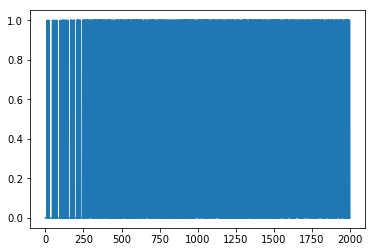

In [8]:
print(rList)
plt.plot(rList)

In [11]:
print(rAll)

0.0


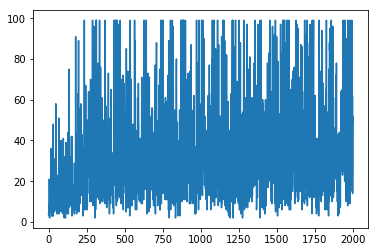

In [7]:
plt.plot(jList)